In [1]:
import numpy             as np

from scipy      import fftpack as fft
from matplotlib import pyplot  as plt

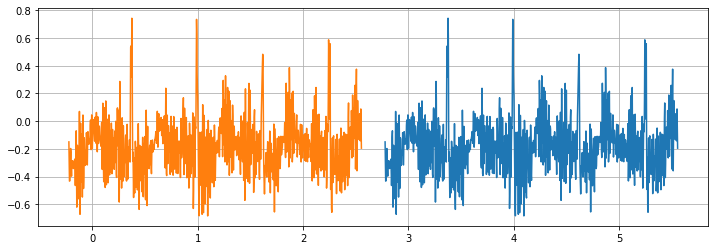

In [12]:
path  = '/home/omarpr/Dropbox/Brain/Data/csv/'
fname = 'ekg_001.csv'

data = np.loadtxt(path+fname,delimiter=',',dtype='str')
ekg  = data.astype('float')[1000:2000]


plt.figure( figsize=(12,4) )
plt.plot( ekg[:,0]  , ekg[:,1] )
plt.plot( ekg[:,0]-3, ekg[:,1] )
plt.grid(True)
plt.show()

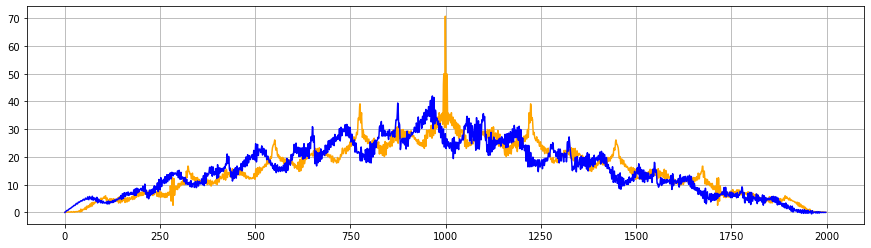

In [3]:
plt.figure( figsize=(15,4) )
plt.plot( np.correlate( ekg[:,1], ekg[:,1], mode='full'), color='orange' )
plt.plot( np.convolve ( ekg[:,1], ekg[:,1], mode='full'), color='blue' )
plt.grid(True)

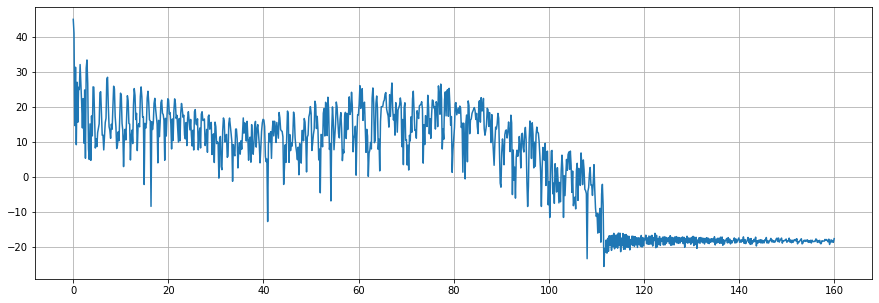

In [4]:
sr      = 320
ekg_fft = fft.fft(  np.correlate( ekg[:,1], ekg[:,1], mode='full')  )

ekg_fft = 10*np.log10(  np.abs(ekg_fft)  )
f       = np.linspace( 0,sr/2,ekg_fft.shape[0]//2 )

plt.figure( figsize=(15,5) )
plt.plot( f,ekg_fft[ :f.shape[0] ] )
plt.grid(True)

## Estimar función de densidad de probabilidad de una señal

In [1]:
path  = '/home/omarpr/Dropbox/Brain/Data/'
fname = 'rec02_001.txt'

data = np.loadtxt(path+fname,delimiter='\t',dtype='str')
data = data.astype('float')[4000:8000]

plt.figure( figsize=(12,4) )
plt.plot( data[:,0], data[:,4] )
plt.plot( data[:,0], data[:,2] )
plt.grid(True)
plt.show()

NameError: name 'np' is not defined

(4000, 5)

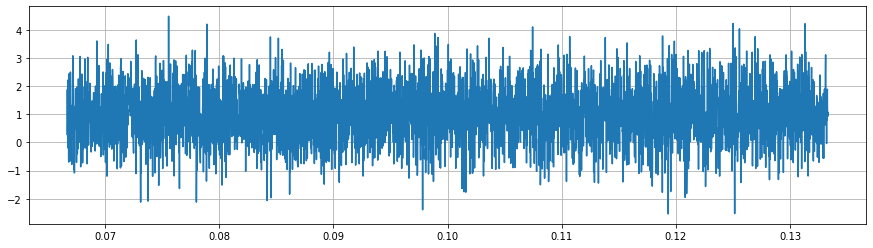

In [21]:
noise = np.random.normal(1,1,data.shape[0])
plt.figure( figsize=(15,4) )
plt.plot( data[:,0], noise )
plt.grid(True)
data.shape

In [22]:
def histogram(s,nbins=10,width=0.5):
    intervals = np.linspace( s.min(), s.max(), nbins+1 ) 
    
    left  = s[:,np.newaxis] > intervals[:-1][np.newaxis]
    right = s[:,np.newaxis] < intervals[1:] [np.newaxis]
    
    hist = (left*right).sum(axis=0)
    plt.bar( intervals[:-1], hist, width)
    plt.grid(True)
    return( intervals[:-1], hist )

(array([-0.0646973 , -0.06177149, -0.05884567, -0.05591986, -0.05299404,
        -0.05006823, -0.04714241, -0.0442166 , -0.04129079, -0.03836497,
        -0.03543916, -0.03251334, -0.02958753, -0.02666171, -0.0237359 ,
        -0.02081009, -0.01788427, -0.01495846, -0.01203264, -0.00910683,
        -0.00618101, -0.0032552 , -0.00032939,  0.00259643,  0.00552224,
         0.00844806,  0.01137387,  0.01429969,  0.0172255 ,  0.02015131,
         0.02307713,  0.02600294,  0.02892876,  0.03185457,  0.03478039,
         0.0377062 ,  0.04063201,  0.04355783,  0.04648364,  0.04940946,
         0.05233527,  0.05526109,  0.0581869 ,  0.06111271,  0.06403853,
         0.06696434,  0.06989016,  0.07281597,  0.07574179,  0.0786676 ,
         0.08159341,  0.08451923,  0.08744504,  0.09037086,  0.09329667,
         0.09622249,  0.0991483 ,  0.10207411,  0.10499993,  0.10792574,
         0.11085156,  0.11377737,  0.11670319]),
 array([216, 172, 138, 119,  99,  82,  90,  74,  94, 107,  65,  70,  70,
  

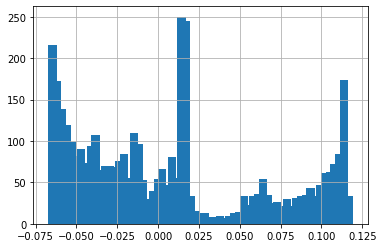

In [29]:
nbins = np.sqrt( data.shape[0] )
histogram(data[:,1],nbins=nbins,width=.005)

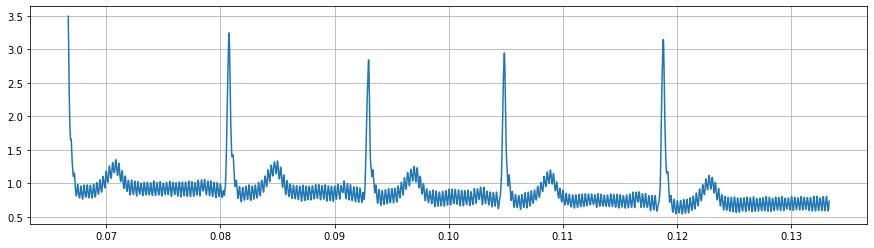

In [30]:
t,s = data[:,0], data[:,2]
plt.figure( figsize=(15,4) )
plt.plot( t,s )
plt.grid(True)

## Media móvil

In [15]:
def segments(s,L=11):
    LEN     = s.shape[0]
    segment = []
    for i in range(LEN-L):
        ep = s[i:i+L]
        segment.append(ep)
    
    segment = np.array(segment)
    return segment.copy()

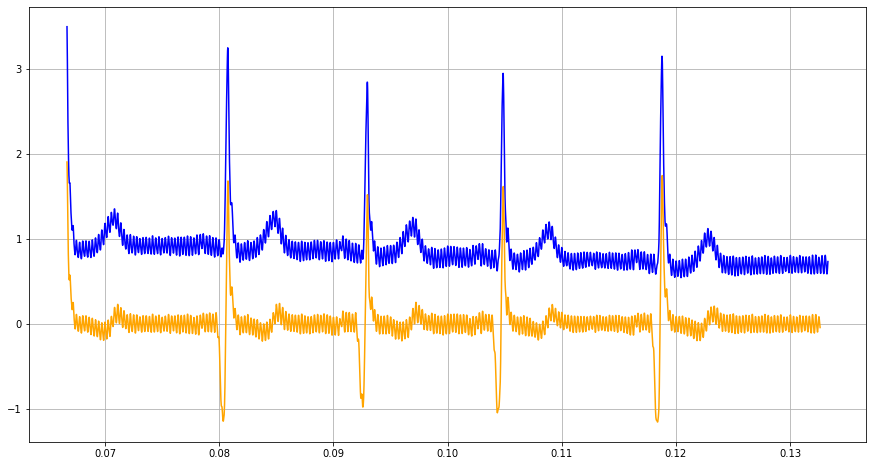

In [23]:
L      = 41
segs   = segments(s,L)
s_mean = segs.mean(axis=1)

plt.figure( figsize=(15,8) )
plt.plot( t     ,s            , color='blue' )
plt.plot( t[:-L],s[:-L]-s_mean, color='orange')
plt.grid(True)

In [36]:
sr = 1000
L  = 31
n  = ( np.arange( L ) - L//2 )
n  = n/sr

w    = np.sqrt(2*np.pi) * np.exp(  -.5*(n)**2  )
segs = segments(s,L)
print(w.shape,segs.shape)

s_mg = np.dot( segs,w[:,np.newaxis] ).flatten()/L
s_m  = segs.mean(axis=1)

(31,) (3969, 31)


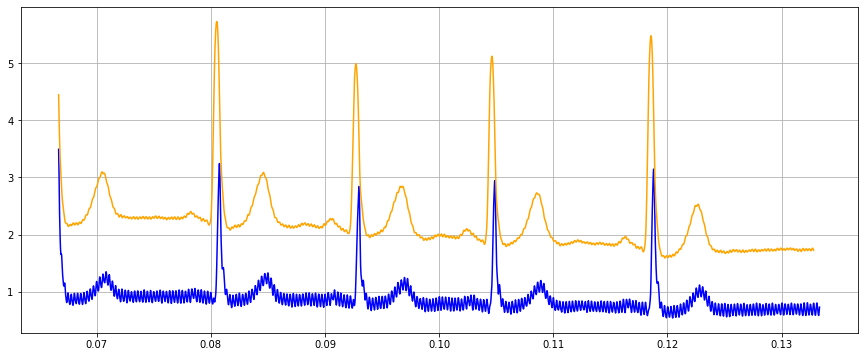

In [37]:
plt.figure( figsize=(15,6) )
plt.plot( t     ,s            , color='blue' )
plt.plot( t[:-L],s_mg, color='orange')
#plt.plot( t[:-L],s_m -s[:-L] , color='green')
plt.grid(True)

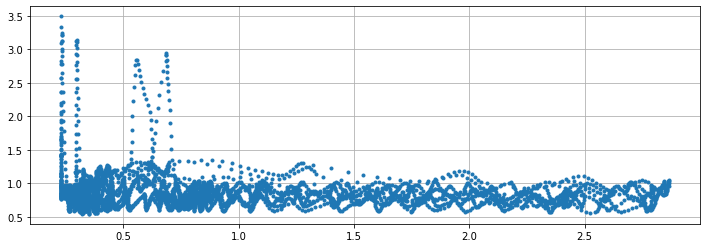

In [6]:
plt.figure( figsize=(12,4) )
plt.plot( data[:,4], data[:,2], '.' )
plt.grid(True)
plt.show()

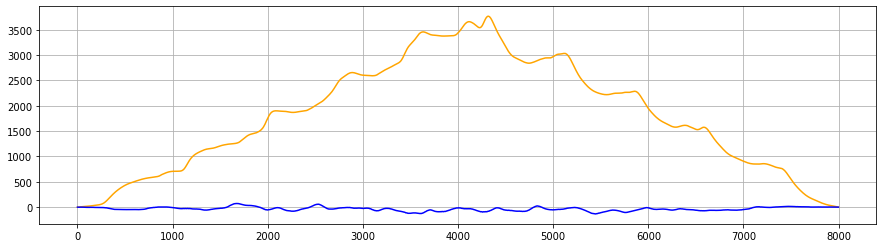

In [7]:
noise = np.random.normal(0,1,data.shape[0])
plt.figure( figsize=(15,4) )
plt.plot( np.correlate( data[:,4], data[:,2], mode='full'), color='orange' )
plt.plot( np.correlate( data[:,4], noise, mode='full'), color='blue' )
plt.grid(True)

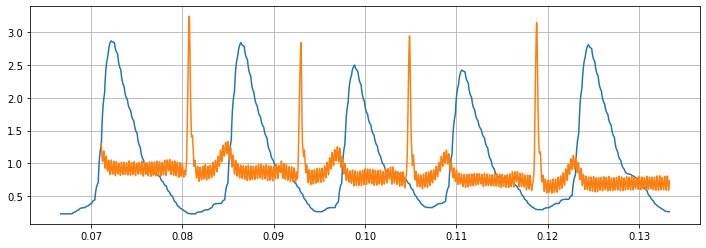

In [8]:
data = np.loadtxt(path+fname,delimiter='\t',dtype='str')
data = data.astype('float')[4000:8000]

S = 265
plt.figure( figsize=(12,4) )
plt.plot( data[:    ,0], data[:    ,4] )
plt.plot( data[S:,0], data[S:,2] )
plt.grid(True)
plt.show()

3634 3457.8565381100516 366


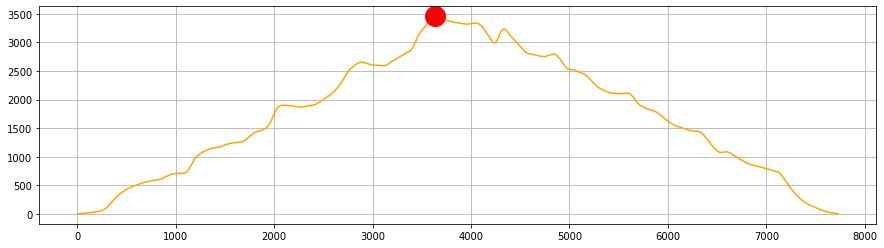

In [9]:
corr = np.correlate( data[:,4], data[S:,2], mode='full')
cmax = np.argmax(corr)

plt.figure( figsize=(15,4) )
plt.plot( corr           ,      color='orange'               )
plt.plot( cmax,corr[cmax], 'o', color='red',   markersize=20 )
plt.grid(True)
print(cmax,corr[cmax],4000-cmax)

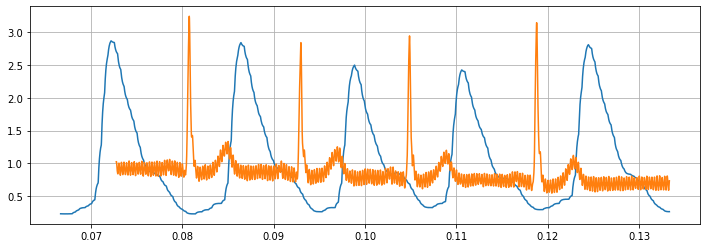

In [10]:
S = 4000-cmax
plt.figure( figsize=(12,4) )
plt.plot( data[:,0], data[:,4] )
plt.plot( data[S:,0], data[S:,2] )
plt.grid(True)
plt.show()